Ques.1.
Delivery_time -> Predict delivery time using sorting time 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [105]:
data1=pd.read_csv("/content/delivery_time.csv")
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [106]:
data2 = data1.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'})
data2

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [107]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      21 non-null     float64
 1   ST      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Scatter Plot

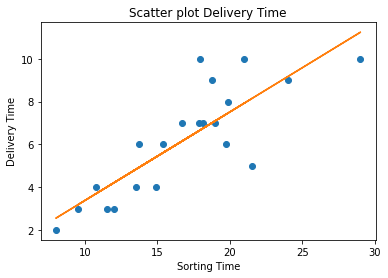

In [109]:
x = data2['DT']
y = data2['ST']
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Delivery Time')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

Correlation

In [110]:
data2.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [111]:
x=data2["DT"]
y=data2["ST"]

In [113]:
import statsmodels.formula.api as smf
model = smf.ols('x~y',data = data2).fit()

In [114]:
model.params

Intercept    6.582734
y            1.649020
dtype: float64

In [115]:
model.rsquared

0.6822714748417231

In [116]:
df=pd.Series([10,30])

In [117]:
pred=pd.DataFrame(df,columns=['y'])

In [118]:
model.predict(pred)

0    23.072933
1    56.053331
dtype: float64

Improve model use log





In [119]:
x_log=np.log(data2['ST'])
y_log=np.log(data2['DT'])

In [120]:
model = smf.ols("y_log ~ x_log",data=data1).fit()
model

In [121]:
model.params

Intercept    1.741987
x_log        0.597522
dtype: float64

In [122]:
print(model.pvalues,'\n',model.tvalues)

Intercept    5.921137e-11
x_log        1.601539e-07
dtype: float64 
 Intercept    13.085552
x_log         8.024484
dtype: float64


In [123]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [124]:
y_log=(1.741987) + (0.597522)*5
y_log

4.729597

In [125]:
newtime=pd.Series([2,4,6,8,10])

In [126]:
pred=pd.DataFrame(newtime,columns=['x_log'])
pred

,x_log
0,2
1,4
2,6
3,8
4,10


In [127]:
model.predict(pred)

0    2.937032
1    4.132076
2    5.327121
3    6.522166
4    7.717210
dtype: float64

Improving model using squarroot trans.

In [128]:
data2.insert(len(data2.columns),'A_sqart',
           np.sqrt(data1.iloc[:,0]))
data2

,DT,ST,A_sqart
0,21.00,10,4.582576
1,13.50,4,3.674235
2,19.75,6,4.444097
3,24.00,9,4.898979
4,29.00,10,5.385165
5,15.35,6,3.917908
6,19.00,7,4.358899
7,9.50,3,3.082207
8,17.90,10,4.230839
9,18.75,9,4.330127


In [129]:
model=smf.ols("DT~A_sqart",data=data2).fit()

In [130]:
model

In [131]:
model.params

Intercept   -15.902667
A_sqart       8.068752
dtype: float64

In [132]:
print(model.pvalues,'\n',model.tvalues)

Intercept    8.158463e-15
A_sqart      9.829837e-21
dtype: float64 
 Intercept   -21.550902
A_sqart      44.806348
dtype: float64


In [133]:
(model.rsquared,model.rsquared_adj)

(0.9906247323423886, 0.9901312972025142)

In [134]:
data2['Squar_del_time']=data2.apply(lambda row:row.DT**2,axis=1)
data2

,DT,ST,A_sqart,Squar_del_time
0,21.00,10,4.582576,441.0000
1,13.50,4,3.674235,182.2500
2,19.75,6,4.444097,390.0625
3,24.00,9,4.898979,576.0000
4,29.00,10,5.385165,841.0000
5,15.35,6,3.917908,235.6225
6,19.00,7,4.358899,361.0000
7,9.50,3,3.082207,90.2500
8,17.90,10,4.230839,320.4100
9,18.75,9,4.330127,351.5625


In [135]:
model=smf.ols('Squar_del_time~ST',data=data2).fit()

In [136]:
model

In [137]:
model.params

Intercept   -37.440078
ST           55.553783
dtype: float64

In [138]:
print(model.pvalues,'\n',model.tvalues)

Intercept    0.593778
ST           0.000035
dtype: float64 
 Intercept   -0.542504
ST           5.368383
dtype: float64


In [139]:
(model.rsquared,model.rsquared_adj)

(0.6026728443618878, 0.5817608888019872)

Ques.2.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

Ques.
Salary_hike -> Build a prediction model for Salary_hike___

In [4]:
df=pd.read_csv("/content/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Scatter Plot

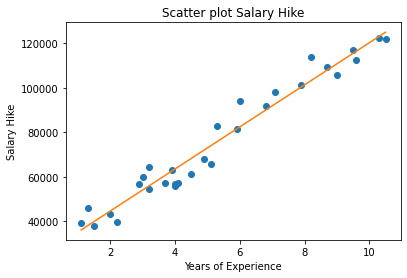

In [10]:
x = df['YearsExperience']
y = df['Salary']
b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')
plt.title('Scatter plot Salary Hike')
plt.xlabel('Years of Experience')
plt.ylabel('Salary Hike')
plt.show()

Correlation.

In [11]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
import statsmodels.formula.api as smf
model = smf.ols("YearsExperience~Salary",data = df).fit()

In [13]:
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [14]:
model.rsquared

0.9569566641435086

In [15]:
new=pd.Series([3,2])

In [16]:
pread=pd.DataFrame(new,columns=['Salary'])

In [17]:
model.predict(pread)

0   -2.382857
1   -2.382958
dtype: float64

#Improve model use log

In [18]:
salary=np.log(df)
salary

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


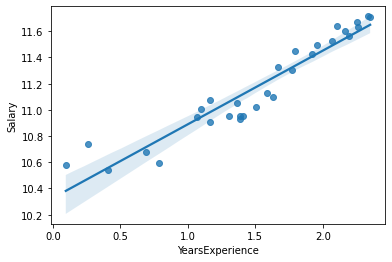

In [20]:
sns.regplot(x='YearsExperience',y='Salary',data=salary)

In [21]:
model = smf.ols('Salary ~ YearsExperience',data=salary).fit()
model

In [22]:
print(model.pvalues,'\n',model.tvalues)

Intercept          9.073132e-45
YearsExperience    7.395278e-16
dtype: float64 
 Intercept          184.867959
YearsExperience     16.352542
dtype: float64


In [23]:
(model.rsquared)

0.905215072581715

#Improving model using squarroot trans.

In [24]:
df.insert(len(df.columns),'A_sqrt',
             np.sqrt(df.iloc[:,0]))
df

,YearsExperience,Salary,A_sqrt
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240
5,2.9,56642.0,1.702939
6,3.0,60150.0,1.732051
7,3.2,54445.0,1.788854
8,3.2,64445.0,1.788854
9,3.7,57189.0,1.923538


In [30]:
model = smf.ols('YearsExperience~A_sqrt',data=df).fit()
model

In [32]:
model.params

Intercept   -4.462988
A_sqrt       4.407228
dtype: float64

In [34]:
print(model.tvalues,'\n',model.pvalues)

Intercept   -16.191194
A_sqrt       36.855490
dtype: float64 
 Intercept    9.514435e-16
A_sqrt       2.836019e-25
dtype: float64


In [36]:
#improving model with square transformation
df['Squar_income']=df.apply(lambda row:row.YearsExperience**2, axis=1)
df

,YearsExperience,Salary,A_sqrt,Squar_income
0,1.1,39343.0,1.048809,1.21
1,1.3,46205.0,1.140175,1.69
2,1.5,37731.0,1.224745,2.25
3,2.0,43525.0,1.414214,4.00
4,2.2,39891.0,1.483240,4.84
5,2.9,56642.0,1.702939,8.41
6,3.0,60150.0,1.732051,9.00
7,3.2,54445.0,1.788854,10.24
8,3.2,64445.0,1.788854,10.24
9,3.7,57189.0,1.923538,13.69


In [37]:
model=smf.ols('Squar_income~YearsExperience',data=df).fit()
model

In [38]:
model.params

Intercept         -25.788060
YearsExperience    11.632006
dtype: float64

In [39]:
print(model.pvalues,'\n',model.tvalues)

Intercept          1.002752e-09
YearsExperience    2.369405e-20
dtype: float64 
 Intercept          -8.969620
YearsExperience    24.280731
dtype: float64


In [40]:
(model.rsquared,model.rsquared_adj)

(0.9546598275352005, 0.9530405356614576)